## Maldición de la dimensionalidad

Es un hecho conocido que en Machine Learning, al momento de que tenemos un aumento de features, la cantidad de parámetros puede incrementar muy rápidamente, hasta al punto en el que se vuelva poco práctico entrenar estos modelos. Al aumentar la cantidad de parámtros entrenables incrementa la posibilidad de que nuestro modelo sufra de overfitting, o sobreajuste, y este tenga un error de generalización mayor de lo deseado. Para combatir esto generalmente se suele recurrir a técnicas de regularización, o a tener que aumentar mucho la cantidad de datos en nuestro set de entrenamiento.

A continuación se muestra cómo al utilizar un modelo de regresión polinomial que toma en cuenta los términos de interacción entre variables, al incrementar el grado del polinomio con el que se desea modelar los datos la cantidad de parámetros incrementa rápidamente.



In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Se importa la librería Polynomial features de sklearn para generar los features polinomiales
from sklearn.preprocessing import PolynomialFeatures

In [10]:
iris_4 = iris.drop('species', axis = 1)

In [12]:
# 4 features originales del dataset iris
iris_4

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
degree_2 = PolynomialFeatures(2)

In [14]:
degree_2_features = degree_2.fit_transform(iris_4)

In [16]:
# Observamos que al utilizar un polinomio grado 2 el número de features aumenta de 4 a 15
degree_2_features.shape[1]

15

In [40]:
feature_amount = list()
for i in range(2,50):
    degree_i = PolynomialFeatures(i)
    degree_i_features = degree_i.fit_transform(iris_4)
    print("Cantidad de features de polynomio grado " + str(i) + ":" + str(degree_i_features.shape[1]))
    feature_amount.append(degree_i_features.shape[1])
    

Cantidad de features de polynomio grado 2:15
Cantidad de features de polynomio grado 3:35
Cantidad de features de polynomio grado 4:70
Cantidad de features de polynomio grado 5:126
Cantidad de features de polynomio grado 6:210
Cantidad de features de polynomio grado 7:330
Cantidad de features de polynomio grado 8:495
Cantidad de features de polynomio grado 9:715
Cantidad de features de polynomio grado 10:1001
Cantidad de features de polynomio grado 11:1365
Cantidad de features de polynomio grado 12:1820
Cantidad de features de polynomio grado 13:2380
Cantidad de features de polynomio grado 14:3060
Cantidad de features de polynomio grado 15:3876
Cantidad de features de polynomio grado 16:4845
Cantidad de features de polynomio grado 17:5985
Cantidad de features de polynomio grado 18:7315
Cantidad de features de polynomio grado 19:8855
Cantidad de features de polynomio grado 20:10626
Cantidad de features de polynomio grado 21:12650
Cantidad de features de polynomio grado 22:14950
Cantidad

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
np.linspace(2,49,48)

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49.])

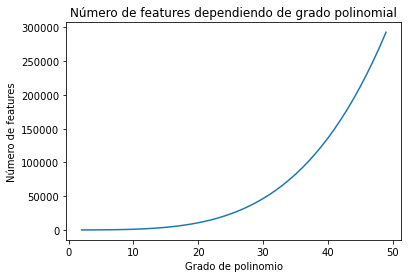

In [44]:

plt.plot(np.linspace(2,49,48), feature_amount)
plt.title('Número de features dependiendo de grado polinomial')
plt.xlabel('Grado de polinomio')
plt.ylabel('Número de features')
plt.show()

# Conclusión

Se puede obsevar en esta pequeña prueba realizada que el número de features aumenta exponencialmente conforme vamos aumentando el grado polinomial del modelo. A esto es lo que se le conoce como la maldición de la dimensionalidad, en la que al aumentar el número de dimensiones para elaborar un modelo, podemos llegar a tener una gran cantidad de features e información esparcida o *sparse matrices*.